In [97]:
import pandas as pdfrom 
from sklearn.tree import DecisionTreeClassifier
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.core.display import HTML
import numpy as np
from matplotlib import pyplot as plt

In [98]:
data = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33],
                     'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
data

data.sort_values('Age')

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


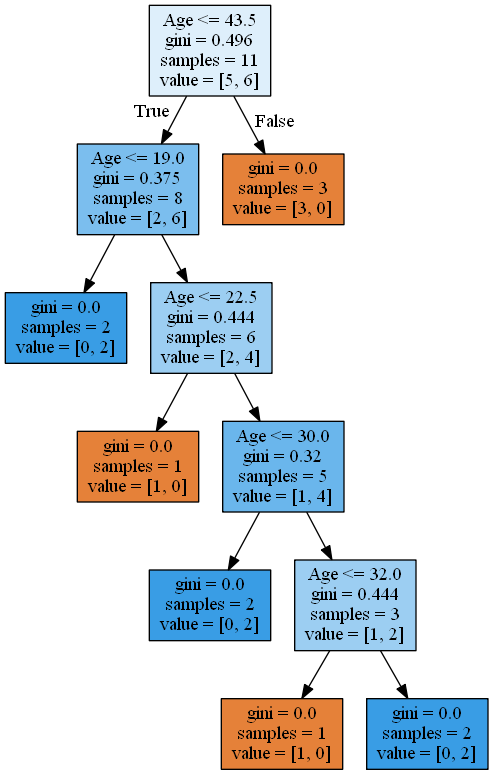

In [99]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Age'].values.reshape(-1, 1), data['Loan Default'].values)

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

tree_graph_to_png(age_tree, feature_names=['Age'], 
                 png_file_to_save='topic3_decision_tree2.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "topic3_decision_tree2.png"
Image(filename = PATH , width=500, height=200)



In [100]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
print(scaler.transform(data))


StandardScaler()
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [101]:
df = pd.read_csv('C:/Users/micke/Desktop/telecom_churn.csv')

df['international plan'] = pd.factorize(df['international plan'])[0]
df['voice mail plan'] = pd.factorize(df['voice mail plan'])[0]
df['churn'] = df['churn'].astype('int')
states = df['state']
y = df['churn']
df.drop(['state', 'churn','phone number'], axis=1, inplace=True)
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [102]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(random_state=17)
knn = KNeighborsClassifier(n_neighbors=5)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [103]:
d  = [[0, 0], [0, 0], [1, 1], [1, 1]]
d_scaled = scaler.fit_transform(d)
d_scaled

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [104]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


tree_pred = tree.predict(X_holdout)
print (f" Accuracy for decision tree is {accuracy_score(y_holdout, tree_pred)}") 

knn_pred = knn.predict(X_holdout_scaled)
print (f" Accuracy for k-nn is {accuracy_score(y_holdout, knn_pred)}")

 Accuracy for decision tree is 0.92
 Accuracy for k-nn is 0.892


In [105]:
small_tree = DecisionTreeClassifier(max_depth = 2,random_state=17)
big_tree = DecisionTreeClassifier(max_depth = 8,random_state=17)



small_data_train , _, small_data_train_y, _ = train_test_split(X_train, y_train, test_size=0.9,random_state=17)
print (f"Small data shape is {small_data_train.shape,small_data_train_y.shape}")

big_data_train, big_data_train_y = X_train,y_train
print (f"Big data shape is {big_data_train.shape,big_data_train_y.shape}")

print (f"=================================================")
print (f"Results demonstrating underfitting and overfitting")
print (f"=================================================")

print ('\n')
small_tree.fit(small_data_train, small_data_train_y)
tree_pred_test = small_tree.predict(X_holdout)
tree_pred_train = small_tree.predict(small_data_train)
print (f" Train Accuracy for small decision tree trained on small data is {accuracy_score(small_data_train_y, tree_pred_train)}, while test accuracy is  {accuracy_score(y_holdout, tree_pred_test)}") 

print ('\n')

big_tree.fit(small_data_train, small_data_train_y)
tree_pred_test = big_tree.predict(X_holdout)
tree_pred_train = big_tree.predict(small_data_train)
print (f" Train Accuracy for Large decision tree trained on small data is {accuracy_score(small_data_train_y, tree_pred_train)}, while test accuracy is  {accuracy_score(y_holdout, tree_pred_test)}") 

print ('\n')

small_tree.fit(big_data_train, big_data_train_y)
tree_pred_test = small_tree.predict(X_holdout)
tree_pred_train = small_tree.predict(small_data_train)
print (f" Train Accuracy for small decision tree trained on Big data is {accuracy_score(small_data_train_y, tree_pred_train)}, while test accuracy is  {accuracy_score(y_holdout, tree_pred_test)}") 

print ('\n')
big_tree.fit(big_data_train, big_data_train_y)
tree_pred_test = big_tree.predict(X_holdout)
tree_pred_train = big_tree.predict(small_data_train)
print (f" Train Accuracy for Large decision tree trained on Big data is {accuracy_score(small_data_train_y, tree_pred_train)}, while test accuracy is  {accuracy_score(y_holdout, tree_pred_test)}") 

Small data shape is ((233, 18), (233,))
Big data shape is ((2333, 18), (2333,))
Results demonstrating underfitting and overfitting


 Train Accuracy for small decision tree trained on small data is 0.9012875536480687, while test accuracy is  0.884


 Train Accuracy for Large decision tree trained on small data is 0.9742489270386266, while test accuracy is  0.862


 Train Accuracy for small decision tree trained on Big data is 0.8884120171673819, while test accuracy is  0.881


 Train Accuracy for Large decision tree trained on Big data is 0.9570815450643777, while test accuracy is  0.944


In [106]:
def count_0_1(arr):
    pos_count = np.count_nonzero(arr==1)
    neg_count = np.count_nonzero(arr==0)
    return pos_count, neg_count

def get_confusion_accuracy(a,b):
    cm = confusion_matrix(a, b)
    print (f"===============")
    print (cm)
    print (f"===============")
    return (accuracy_score(a, b))


tree = DecisionTreeClassifier(random_state=17)

train_pos_x = X_train[y_train==1]
train_neg_x =  X_train[y_train==0]

test_pos_x = X_holdout[y_holdout==1]
test_neg_x = X_holdout[y_holdout==0]

# print (train_pos_x.shape,train_neg_x.shape,test_pos_x.shape,test_neg_x.shape )

print (f"=================================================")
print (f"Balanced and Imbalanced dataset statistics")
print (f"=================================================")


balance_train_x, balance_train_y = np.concatenate((train_pos_x,train_neg_x[0:350])), np.concatenate(([1]*350,[0]*350))
pos_count, neg_count = count_0_1(balance_train_y)
print (f"For Balance Training Dataset, shape is {balance_train_x.shape} and we have {pos_count} positive class, and {neg_count} negative class")


imbalance_train_x, imbalance_train_y = np.concatenate((train_pos_x[0:10],train_neg_x)), np.concatenate(([1]*10,[0]*1983))
pos_count, neg_count = count_0_1(imbalance_train_y)
print (f"For ImBalance Training Dataset, shape is {imbalance_train_x.shape} and we have {pos_count} positive class, and {neg_count} negative class")


balance_test_x, balance_test_y = np.concatenate((test_pos_x,test_neg_x[0:133])), np.concatenate(([1]*133,[0]*133))
pos_count, neg_count = count_0_1(balance_test_y)
print (f"For Balance Testing Dataset, shape is {balance_test_x.shape} and we have {pos_count} positive class, and {neg_count} negative class")


imbalance_test_x, imbalance_test_y = np.concatenate((test_pos_x[0:5],test_neg_x)), np.concatenate(([1]*5,[0]*867))
pos_count, neg_count = count_0_1(imbalance_test_y)
print (f"For ImBalance Testing Dataset, shape is {imbalance_test_x.shape} and we have {pos_count} positive class, and {neg_count} negative class")

print ('\n')


print (f"=================================================")
print (f"Train on balance and test on imbalance")
print (f"=================================================")

tree.fit(balance_train_x, balance_train_y)
tree_pred_test = tree.predict(imbalance_test_x)
tree_pred_train = tree.predict(balance_train_x)
print (f" Train Accuracy for decision tree trained on balanced data is {get_confusion_accuracy(balance_train_y, tree_pred_train)}, while test accuracy on imbalanced data is {get_confusion_accuracy(imbalance_test_y, tree_pred_test)}") 

print ('\n')

print (f"=================================================")
print (f"Train on balance and test on balance")
print (f"=================================================")
tree_pred_test = tree.predict(balance_test_x)
print (f" Train Accuracy for decision tree trained on balanced data is {get_confusion_accuracy(balance_train_y, tree_pred_train)}, while test accuracy on balanced data is {get_confusion_accuracy(balance_test_y, tree_pred_test)}") 

print ('\n')

print (f"=================================================")
print (f"Train on imbalance and test on balance")
print (f"=================================================")
tree.fit(imbalance_train_x, imbalance_train_y)
tree_pred_test = tree.predict(balance_test_x)
tree_pred_train = tree.predict(imbalance_train_x)
print (f" Train Accuracy for decision tree trained on imbalanced data is {get_confusion_accuracy(imbalance_train_y, tree_pred_train)}, while test accuracy on balanced data is {get_confusion_accuracy(balance_test_y, tree_pred_test)}") 


print ('\n')
print (f"=================================================")
print (f"Train on imbalance and test on imbalance")
print (f"=================================================")
tree_pred_test = tree.predict(imbalance_test_x)
print (f" Train Accuracy for decision tree trained on imbalanced data is {get_confusion_accuracy(imbalance_train_y, tree_pred_train)}, while test accuracy on imbalanced data is  {get_confusion_accuracy(imbalance_test_y, tree_pred_test)}") 





Balanced and Imbalanced dataset statistics
For Balance Training Dataset, shape is (700, 18) and we have 350 positive class, and 350 negative class
For ImBalance Training Dataset, shape is (1993, 18) and we have 10 positive class, and 1983 negative class
For Balance Testing Dataset, shape is (266, 18) and we have 133 positive class, and 133 negative class
For ImBalance Testing Dataset, shape is (872, 18) and we have 5 positive class, and 867 negative class


Train on balance and test on imbalance
[[350   0]
 [  0 350]]
[[688 179]
 [  0   5]]
 Train Accuracy for decision tree trained on balanced data is 1.0, while test accuracy on imbalanced data is 0.7947247706422018


Train on balance and test on balance
[[350   0]
 [  0 350]]
[[108  25]
 [ 30 103]]
 Train Accuracy for decision tree trained on balanced data is 1.0, while test accuracy on balanced data is 0.793233082706767


Train on imbalance and test on balance
[[1983    0]
 [   0   10]]
[[133   0]
 [112  21]]
 Train Accuracy for deci

In [107]:
np.random.seed(17)

tree = DecisionTreeClassifier(random_state=17)

tree.fit(X_train, y_train)

print (f"=================================================")
print (f"Results without addition of irrelevant attributes")
print (f"=================================================")


tree_pred = tree.predict(X_holdout)
print (f" Accuracy of decision tree on test dataset {accuracy_score(y_holdout, tree_pred)}") 

tree_pred = tree.predict(X_train)
print (f" Accuracy for decision tree on training dataset {accuracy_score(y_train, tree_pred)}")


noise_train = np.expand_dims(np.random.normal(30,100,2333), axis=1) #noise train
noise_test = np.expand_dims(np.random.normal(500,200,1000), axis=1)  #noise test


X_train_noise = np.concatenate((X_train,noise_train),axis=1) #Adding irrelavant attribute to train
X_holdout_noise = np.concatenate((X_holdout,noise_test),axis=1) #Adding irrelavant attribute to test

tree.fit(X_train_noise, y_train) # Fitting decision tree 

print (f"=================================================")
print (f"Results with addition of irrelevant attributes")
print (f"=================================================")

tree_pred = tree.predict(X_holdout_noise)
print (f" Accuracy of decision tree on test dataset {accuracy_score(y_holdout, tree_pred)}") 

tree_pred = tree.predict(X_train_noise)
print (f" Accuracy for decision tree on training dataset {accuracy_score(y_train, tree_pred)}")

Results without addition of irrelevant attributes
 Accuracy of decision tree on test dataset 0.92
 Accuracy for decision tree on training dataset 1.0
Results with addition of irrelevant attributes
 Accuracy of decision tree on test dataset 0.884
 Accuracy for decision tree on training dataset 1.0


In [108]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,10),
               'max_features': range(4,18)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_features': range(4, 18)},
             verbose=True)

In [109]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,10),
               'max_features': range(4,18)}

tree_grid = GridSearchCV(tree, tree_params, cv=10, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 10 folds for each of 126 candidates, totalling 1260 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_features': range(4, 18)},
             verbose=True)

In [110]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=10, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


({'knn__n_neighbors': 9}, 0.8868383404864092)

In [111]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

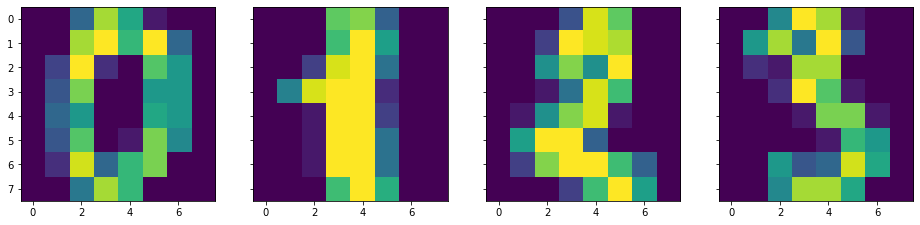

In [112]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]));

In [113]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,random_state=17)

In [114]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_neighbors=10))])

tree.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train);

In [115]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn_pipe.predict(X_holdout)
print (f"K-Nearest neighbor accuracy is {accuracy_score(y_holdout, knn_pred)}")
print (f"Decision tree accuracy is {accuracy_score(y_holdout, tree_pred)}") # (0.976, 0.666)

K-Nearest neighbor accuracy is 0.975925925925926
Decision tree accuracy is 0.6666666666666666


In [116]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
               'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params, 
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

In [117]:
tree_grid.best_params_, tree_grid.best_score_ # ({'max_depth': 20, 'max_features': 64}, 0.844)

({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [118]:
print (f"Decision tree accuracy is {accuracy_score(y_holdout,  tree_grid.predict(X_holdout))}") # (0.976, 0.666)

Decision tree accuracy is 0.8425925925925926
